In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 4ECA-1B72

 Directory of C:\Users\dhami\Research\STARTastro\DhamiBusch-Research25\practicing base+gaus

07/28/2025  01:42 PM    <DIR>          .
07/28/2025  02:21 PM    <DIR>          ..
07/28/2025  01:35 PM    <DIR>          .ipynb_checkpoints
07/10/2025  05:08 PM           671,872 104625p3000.ascii
07/24/2025  09:52 PM           872,871 baselinepracticing.ipynb
07/13/2025  02:57 PM           134,485 OH119070p2800_67.ascii
07/13/2025  02:58 PM           134,485 OH119210p2000_67.ascii
07/13/2025  02:58 PM           134,485 OH119380p3967_67.ascii
07/27/2025  02:59 PM         1,224,778 OHHighLat104625p3000.ipynb
               6 File(s)      3,172,976 bytes
               3 Dir(s)  332,856,467,456 bytes free


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit
import scipy.integrate as integrate
import scipy.special as spec


In [3]:
# Open the file in read mode
with open('104625p3000.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:     58   OH_104625p3000 2015-04-30 +19 51 52.0
          RADIO                  Ta    
        km/s-LSR                 I
    -990.3143514811722525      0.0743901
    -990.1291731674480161      0.2604961
    -989.9439948537237797      0.3730844
    -989.7588165400661637      0.4315341
    -989.5736382263418136      0.4573607
    -989.3884599126175772      0.4671665
    -989.2032815988933407      0.4705652
    -989.0181032851689906      0.4717380
    -988.8329249714447542      0.4722117
    -988.6477466577205178      0.4722615
    -988.4625683439962813      0.4717963
    -988.2773900302719312      0.4703895
    -988.0922117165476948      0.4680113
    -987.9070334028234583      0.4650590
    -987.7218550890992219      0.4621740
    -987.5366767753748718      0.4599673
    -987.3514984616506354      0.4586837
    -987.1663201479263989      0.4580185
    -986.9811418342022762      0.4575146
    -986.7959635204779261      0.4568368
    -986.6107852067536896      0.4555281
    -986.42

In [6]:
data = ascii.read(file_path, data_start=4)
x=data['col1']
y=data['col2']

In [7]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = '104625p3000.ascii'
# Load the ASCII file into a DataFrame
df = pd.read_csv(file_path)  # Example: tab-delimited file
# said low_memory=False so it reads whole file instead of guessing
# Display the first few rows of the DataFrame
print(data)

       col1            col2   
------------------ -----------
 -990.129173167448   0.2604961
-989.9439948537238   0.3730844
-989.7588165400662   0.4315341
-989.5736382263418   0.4573607
-989.3884599126176   0.4671665
-989.2032815988933   0.4705652
 -989.018103285169    0.471738
-988.8329249714448   0.4722117
-988.6477466577205   0.4722615
-988.4625683439963   0.4717963
-988.2773900302719   0.4703895
-988.0922117165477   0.4680113
-987.9070334028235    0.465059
               ...         ...
 2041.239822452208 280.4858398
2041.4250007659657 280.7879333
2041.6101790796567 281.0845032
2041.7953573934142 281.3755493
2041.9805357071052 281.6845093
2042.1657140208627 282.0192261
2042.3508923345537 282.4656982
2042.5360706483111 283.2973328
2042.7212489620022 285.3188171
2042.9064272757598 290.1943054
2043.0916055894509 300.7596741
2043.2767839032083 320.6321716
2043.4619622168993 353.0071411
Length = 16383 rows


C:\Users\dhami\AppData\Local\Temp\ipykernel_29368\4059525029.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


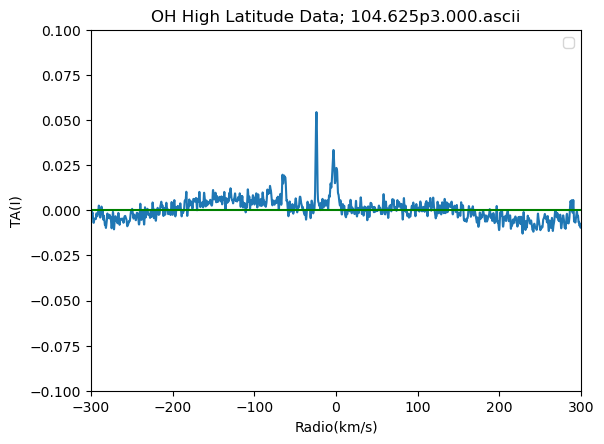

In [8]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]
plt.xlim([-300, 300])
plt.ylim([-0.1, 0.1])
plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()

plt.tight_layout(pad=2.0) # so data doesn't overlap

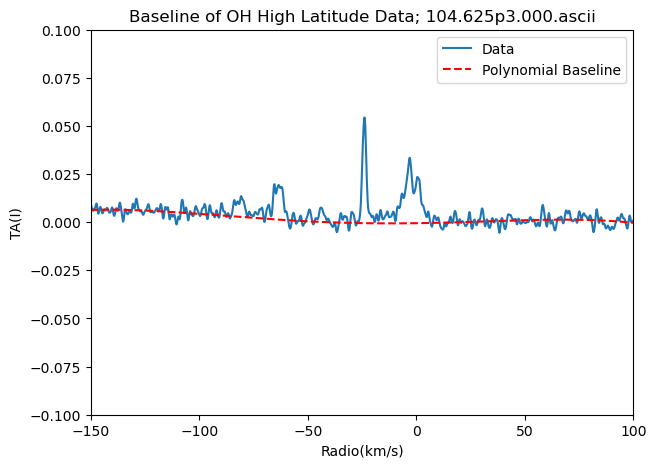

In [9]:
#dataforbaseline = {'x': data['col1'], 'y': data['col2']}
#df = pd.DataFrame(dataforbaseline)
#x = df['x'].values
#y = df['y'].values

# Calculate the baseline (mean)
#baseline = df['y'].mean()

#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -150) & (x <= -100))[0])
gooddata2 = list(np.where((x >= 20) & (x <= 100))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])

#params =  poly_model.guess(y, x=x)
#result = poly_model.fit(y, params, x=x
#print(result.fit_report())
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-150, 100])
plt.ylim([-0.1, 0.1])
plt.plot(x, y, label='Data')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Baseline of OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()
plt.show()

In [10]:
# Subtract Baseline
y_sub = y-y_eval

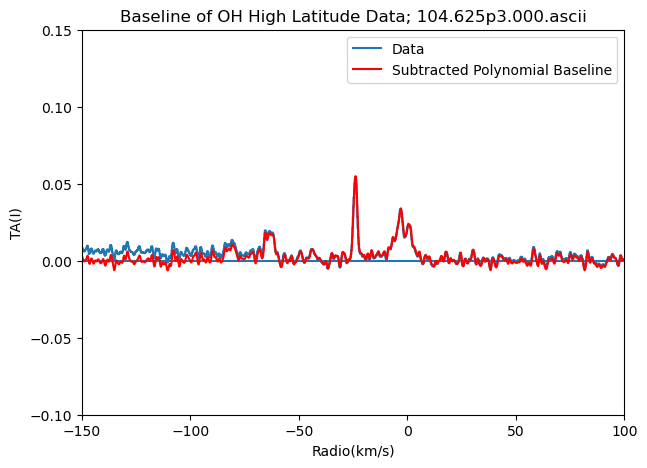

In [11]:
# Create a new model + set parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -150) & (x <= -100))[0])
gooddata2 = list(np.where((x >= 20) & (x <= 100))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])
#print(result.fit_report())
#x1 = np.linspace(-300, 300)
#y_fit = poly_model.eval(params, x=x)
#region = list(np.where((x >= -200) & (x <= 100))[0])

# new fitted values
#y_sub = y_sub-y_eval

# Plot data and baseline to make sure it worked
plt.figure(figsize=(7, 5))
plt.xlim([-150, 100])
plt.ylim([-0.1, 0.15])

plt.axhline(0)
plt.step(x, y, label='Data', linestyle = 'solid')
plt.plot(x, y_sub, label='Subtracted Polynomial Baseline', color='red', linestyle='solid')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Baseline of OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()
plt.show()

In [12]:
#print(np.std(y[gooddata])) 
noise=np.std(y[gooddata]) * u.K
noise

<Quantity 0.00350553 K>

In [13]:
noise_sub= np.std(y_sub[gooddata]) * u.K
noise_sub

<Quantity 0.00245118 K>

In [14]:
noise.to('mK')

<Quantity 3.50552932 mK>

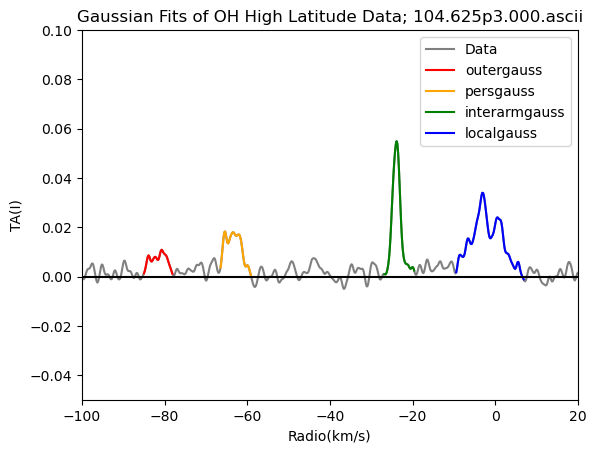

In [15]:
# Gaussian Model
#np.where to focus on a specific range
#mask = np.where((x > -200) & (x < 100))
#x_filtered = x[mask]
#y_filtered = y[mask]

#gauss_model1 = GaussianModel(prefix='outer_')
#gauss_model2 = GaussianModel(prefix='pers_')
#gauss_model3 = GaussianModel(prefix='inter_')
#gauss_model4 = GaussianModel(prefix='loc_')

#allgauss_model=gauss_model1 + gauss_model2 + gauss_model3 + gauss_model4
#params = allgauss_model.make_params()
# params.add('outer_amplitude', value=0.015, min=0)
# params.add('outer_center', value=-81)
# params.add('outer_width', value=6.99)

# params.add('pers_amplitude', value=0.021, min=0)
# params.add('pers_center', value=-64)
# params.add('pers_width', value=7.5, min=0)

# params.add('inter_amplitude', value=0.056, min=0)
# params.add('inter_center', value=-23.5)
# params.add('inter_width', value=7.5, min=0)

# params.add('loc_amplitude', value=0.035, min=0)
# params.add('loc_center', value=-4)
# params.add('loc_width', value=15, min=0)

# result=allgauss_model.fit(y_sub, params, x=x)
#print(result.fit_report())

#x_outer, y_outer = x[outerreg], y_sub[outerreg]
#x_pers, y_pers = x[persreg], y_sub[persreg]
#x_inter, y_inter = x[interreg], y_sub[interreg]
#x_loc, y_loc = x[locreg], y_sub[locreg]

#gauss_model=GaussianModel()
#params=gauss_model.make_params(amplitude=0.056, center=-24, sigma=2) 
     # amplitude=highest peak, center=where highest peak is located, sigma=peak width in x-coo
#result=gauss_model.fit(y_filtered, params, x=x_filtered)
#print(result.fit_report())

#plt.figure(figsize=(7, 5))
#plt.xlim([-100, 100])
#plt.ylim([-0.1, 0.15])

#print(result.fit_report())

outerreg = np.where((x >= -84.99) & (x <= -78))[0] # Outer Arm; this np.where is to fit spec regions
# -84.99 and -78
persreg = np.where((x >= -66.5) & (x <= -59))[0] # Perseus feature
# -66.5 and -59
interreg = np.where((x >= -27) & (x <= -19.5))[0] # Inter Arm
# -27 and -19.5
locreg = np.where((x >= -9.5) & (x <= 7))[0] # Local Arm
# -9.5 and 7

plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-100, 20])
plt.ylim([-0.05, 0.1])
plt.plot(x[outerreg], y_sub[outerreg], '-',label='outergauss',color='r')
plt.plot(x[persreg], y_sub[persreg], '-', label='persgauss', color='orange')
plt.plot(x[interreg], y_sub[interreg], '-', label='interarmgauss', color='g')
plt.plot(x[locreg], y_sub[locreg], '-', label='localgauss', color='b')
plt.axhline(0, color='k')
#plt.plot(x, result.eval(x=x, params=result.params, prefix='outer_'), '--', label='outer', color='r')
#plt.plot(x, result.eval(x=x, params=result.params, prefix='pers_'), '--', label='perseus', color='orange')
#plt.plot(x, result.eval(x=x, params=result.params, prefix='inter_'), '--', label='interarm', color='green')
#plt.plot(x, result.eval(x=x, params=result.params, prefix='loc_'), '--', label='local', color='blue')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian Fits of OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()
plt.show()

C:\Users\dhami\miniforge3\envs\STARTastro\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


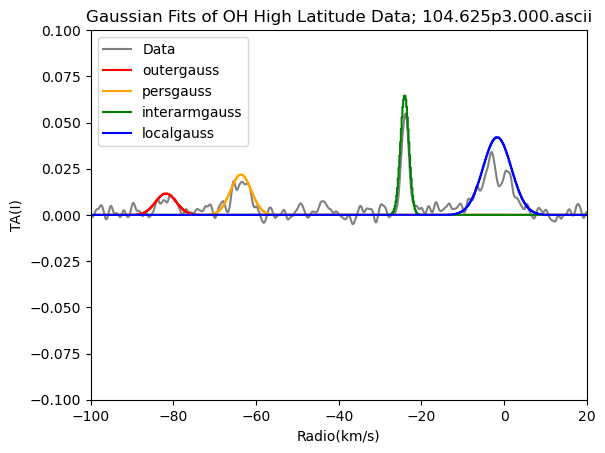

In [16]:
gauss_model=GaussianModel()
outerparams = gauss_model.guess(y_sub[outerreg], x=x[outerreg])
persparams = gauss_model.guess(y_sub[persreg], x=x[persreg])
interparams = gauss_model.guess(y_sub[interreg], x=x[interreg])
locparams = gauss_model.guess(y_sub[locreg], x=x[locreg])

outerfit = gauss_model.fit(y_sub[outerreg], outerparams, x=x[outerreg])
persfit = gauss_model.fit(y_sub[persreg], persparams, x=x[persreg])
interfit = gauss_model.fit(y_sub[interreg], interparams, x=x[interreg])
locfit = gauss_model.fit(y_sub[locreg], locparams, x=x[locreg])
#plot
y_gauss_outer = gauss_model.eval(outerparams, x=x)
y_gauss_pers = gauss_model.eval(persparams, x=x)
y_gauss_inter = gauss_model.eval(interparams, x=x)
y_gauss_loc = gauss_model.eval(locparams, x=x)

plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-100, 20])
plt.ylim([-0.1, 0.1])
# plt.step is for visualizing abrupt changes in data ig
plt.step(x, y_gauss_outer, '-',label='outergauss',color='r')
plt.step(x, y_gauss_pers, '-', label='persgauss', color='orange')
plt.step(x, y_gauss_inter, '-', label='interarmgauss', color='g')
plt.step(x, y_gauss_loc, '-', label='localgauss', color='b')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian Fits of OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()
plt.show()

In [17]:
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 4 fit results from LMFIT for a single gaussian
    '''
    # Setting up axes:
    y_sub = ta
    x = vel 
    
    # Define model:
    # Fit arbitary n gaussians.
    #for i in range(n):
    #    gauss_model=GaussianModel()

    # bounds = [outerlow,outerhigh, perslow, pershigh, interlow, interhigh, loclow, lochigh]

    # Set bounds:
    outerreg = np.where((x >= bounds[0]) & (x <= bounds[1]))[0] # Outer Arm; this np.where is to fit spec regions
    # -84.99 and -78
    persreg = np.where((x >= bounds[2]) & (x <= bounds[3]))[0] # Perseus feature
    # -66.5 and -59
    interreg = np.where((x >= bounds[4]) & (x <= bounds[5]))[0] # Inter Arm
    # -27 and -19.5
    locreg = np.where((x >= bounds[6]) & (x <= bounds[7]))[0] # Local Arm
    # -9.5 and 7
    # initial Guess of the parameters
    outerparams = gauss_model.guess(y_sub[outerreg], x=x[outerreg])
    persparams = gauss_model.guess(y_sub[persreg], x=x[persreg])
    interparams = gauss_model.guess(y_sub[interreg], x=x[interreg])
    locparams = gauss_model.guess(y_sub[locreg], x=x[locreg])
    # Actual best fit to the data, given initial guess
    outerfit = gauss_model.fit(y_sub[outerreg], outerparams, x=x[outerreg])
    persfit = gauss_model.fit(y_sub[persreg], persparams, x=x[persreg])
    interfit = gauss_model.fit(y_sub[interreg], interparams, x=x[interreg])
    locfit = gauss_model.fit(y_sub[locreg], locparams, x=x[locreg])
    # return best fit:
    fitresult = [locfit, interfit, persfit, outerfit]

    return fitresult


In [18]:
fitResult = gaussFit(x, y_sub, bounds = [-85, -70, -69, -55, -30, -17, -15, 10])

In [19]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.25335193,0.00714367,(2.82%),0.3793632539389888,-inf,inf,True,
center,-2.34105621,0.12977774,(5.54%),-1.69362910094726,-inf,inf,True,
sigma,3.98726727,0.12989981,(3.26%),3.518387960711034,0.00000000,inf,True,
fwhm,9.38929672,0.30589067,(3.26%),8.285170337641558,-inf,inf,False,2.3548200*sigma
height,0.02534889,7.1465e-04,(2.82%),0.04301516795530389,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


In [20]:
# 1 Gaussian model
#gauss_model=GaussianModel(prefix='oh1') + GaussianModel(prefix='oh2')
gauss_model=GaussianModel()

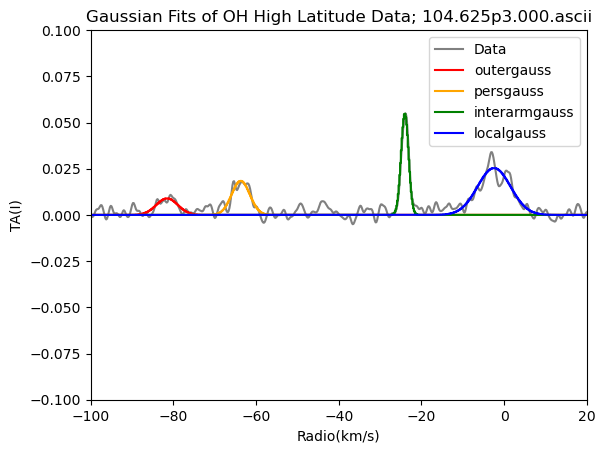

In [21]:
#plot
y_gauss_outer = gauss_model.eval(fitResult[3].params, x=x)
y_gauss_pers = gauss_model.eval(fitResult[2].params, x=x)
y_gauss_inter = gauss_model.eval(fitResult[1].params, x=x)
y_gauss_loc = gauss_model.eval(fitResult[0].params, x=x)

plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-100, 20])
plt.ylim([-0.1, 0.1])
# plt.step is for visualizing abrupt changes in data ig
plt.step(x, y_gauss_outer, '-',label='outergauss',color='r')
plt.step(x, y_gauss_pers, '-', label='persgauss', color='orange')
plt.step(x, y_gauss_inter, '-', label='interarmgauss', color='g')
plt.step(x, y_gauss_loc, '-', label='localgauss', color='b')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian Fits of OH High Latitude Data; 104.625p3.000.ascii') # Creates a title for the plot
plt.legend()
plt.show()

In [68]:
# # Computing the Integral
# def compute_integral_trapezoid(vel, ta, bounds):
#     mask = (vel >= bounds[0]) & (vel <= bounds[1])
#     return np.trapezoid(ta[mask], vel[mask])

In [69]:
# vel = x
# ta = y_sub
# bounds = [-85, -70, -69, -55, -30, -17, -15, 10]
# # List of all intervals
# intervals = [(-85, -70), (-69, -55), (-30, -17), (-15, 10)]
# # Loop through and compute all
# for b1, b2 in intervals:
#     result = compute_integral_trapezoid(vel, ta, [b1, b2])
#     print(f"Integral from {b1} to {b2}: {result}")

Integral from -85 to -70: 0.0680398231133453
Integral from -69 to -55: 0.10028424055551484
Integral from -30 to -17: 0.1450812367830809
Integral from -15 to 10: 0.26462900801556855


In [22]:
vel=x
ta=y_sub

In [23]:
vel[1]-vel[0]

np.float64(0.18517831372429328)

In [29]:
# Integration range? We only want to integrate under the Gaussian, how do we do that?
integral1 = np.sum(ta[outerreg])*(vel[1]-vel[0])
print(integral1)
print(integral1*2.3e14)

0.04799219936012523
11038205852828.803


In [30]:
#Checking noise in the baseline regions:
gooddata = np.where((vel >= -150) & (vel <= 100))[0]
np.std(ta[gooddata])

np.float64(0.006694490043841732)

In [31]:
# Number of channels in Local Profile intergral
print(len(vel[outerreg]))
print(np.sqrt(len(vel[outerreg])) * np.std(ta[gooddata]))
err = np.sqrt(len(vel[outerreg])) * np.std(ta[gooddata])

38
0.04126760816899437


In [32]:
# Signal/Noise (integral/err)
integral1/err

np.float64(1.1629508345526856)